## 0. Import des librairies


In [1]:
%load_ext autoreload
%autoreload 2

from keras.preprocessing.image import ImageDataGenerator
from src import fonctions

Using TensorFlow backend.


## 1. Paramétrage de l'application

In [2]:
DATA_ROOT = "data/"
MODELS_ROOT = "saved_models/"
TRAINING_PATH = DATA_ROOT + "dataset/train"
TESTING_PATH = DATA_ROOT + "dataset/test"
DATASET = DATA_ROOT + "dataset"

img_size = (32,32)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory = TRAINING_PATH, target_size = img_size, class_mode = "categorical")
test_generator = test_datagen.flow_from_directory( directory = TESTING_PATH, target_size = img_size, class_mode = "categorical")

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


## 3. Créations du modèle


In [3]:
# Autres paramètres
kernel = 3
stride = 2
epochs = 5

#Entraînement du modèle et enregistrement mlflow
fonctions.training_model(kernel, stride, epochs, train_generator, test_generator, "model_ML.h5")


Epoch 1/5
47/47 [==============================] - 3s 59ms/step - loss: 0.9161 - accuracy: 0.5660 - val_loss: 0.7806 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 3s 57ms/step - loss: 0.6793 - accuracy: 0.6987 - val_loss: 0.6289 - val_accuracy: 0.6533
Epoch 3/5
47/47 [==============================] - 3s 59ms/step - loss: 0.6043 - accuracy: 0.7453 - val_loss: 0.4829 - val_accuracy: 0.7267
Epoch 4/5
47/47 [==============================] - 3s 58ms/step - loss: 0.5685 - accuracy: 0.7680 - val_loss: 0.3455 - val_accuracy: 0.7467
Epoch 5/5
47/47 [==============================] - 2s 42ms/step - loss: 0.5477 - accuracy: 0.7753 - val_loss: 0.5298 - val_accuracy: 0.7500


## 5. Test du modèle


Modèle chargé!


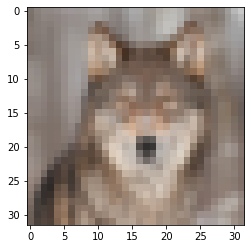


Roulement de tambour...
Prédictions :

wolf : 58.14 %
table : 33.24 %
rose : 8.62 %




In [4]:
# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_ML.h5","src/images/loup_qui_tue.jpg", DATASET)